In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
import seaborn as sns
import sklearn

# 0. Описание задачи

Компания хочет знать, кто из реальных кандидатов действительно хочет работать в компании после обучения, а кто ищет новую работу, потому что это помогает сократить затраты и время, а также качество обучения или планирования курсов и категоризации кандидатов. Этот набор данных предназначен для понимания факторов, которые заставляют человека менять текущую работу и для HR-исследований. С помощью моделей, которые используют текущие учетные данные, демографические данные, данные об опыте, возможно предсказать вероятность того, что кандидат будет искать новую работу или продолжит работать в компании, а также интерпретировать факторы, влияющие на решение сотрудника.

# 1. Загрузка и чтение данных

In [2]:
data_raw = pd.read_csv("aug_train.csv")
data_raw.shape

(19158, 14)

In [3]:
data_raw.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
data_raw.tail()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0
19157,23834,city_67,0.855,NaN,No relevent experience,no_enrollment,Primary School,NaN,2,NaN,NaN,1,127,0.0


Каждый человек охарактеризован 14 признаками. Рассмотрим каждый из них:

0. enrolle_id: уникальный идентификатор кандидата
1. city: код города
2. city_ development _index: индекс развития города (масштабированный)
3. gender: пол кандидата
4. relevent_experience: соответствующий опыт кандидата
5. enrolled_university: тип зачисленного курса университета, если таковой имеется
6. education_level: уровень образования кандидата
7. major_discipline: основная дисциплина кандидата
8. experience: общий стаж кандидата в годах
9. company_size: количество сотрудников в компании текущего работодателя
10. company_type : тип текущего работодателя
11. lastnewjob: разница в годах между предыдущей и текущей работой
12. training_hours: количество завершенных часов обучения
13. target: 0 – Не ищет работу, 1 – Ищет работу

Задача прогнозирования состоит в том, чтобы определить бинарный признак target.

In [5]:
data_raw.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

Признак relevent_experience является по своей сути бинарным, заменим 1, если имеет соответсвующий опыт и 0, если опыт отсутствует.

In [6]:
data_raw.relevent_experience[data_raw.relevent_experience == 'Has relevent experience'] = 1
data_raw.relevent_experience[data_raw.relevent_experience == 'No relevent experience'] = 0
data_raw['relevent_experience'] = data_raw['relevent_experience'].astype('bool')
data_raw.tail()

C:\Users\Egor\AppData\Local\Temp\ipykernel_12952\2983084136.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_raw.relevent_experience[data_raw.relevent_experience == 'Has relevent experience'] = 1
C:\Users\Egor\AppData\Local\Temp\ipykernel_12952\2983084136.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_raw.relevent_experience[data_raw.relevent_experience == 'No relevent experience'] = 0


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
19153,7386,city_173,0.878,Male,False,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,True,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,True,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,True,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0
19157,23834,city_67,0.855,NaN,False,no_enrollment,Primary School,NaN,2,NaN,NaN,1,127,0.0


In [7]:
data_raw['city'] = data_raw['city'].astype('category')
data_raw['gender'] = data_raw['gender'].astype('category')
data_raw['enrolled_university'] = data_raw['enrolled_university'].astype('category')
data_raw['education_level'] = data_raw['education_level'].astype('category')
data_raw['major_discipline'] = data_raw['major_discipline'].astype('category')
data_raw['experience'] = data_raw['experience'].astype('category')
data_raw['company_size'] = data_raw['company_size'].astype('category')
data_raw['company_type'] = data_raw['company_type'].astype('category')
data_raw['last_new_job'] = data_raw['last_new_job'].astype('category')

data_raw['target'] = data_raw['target'].astype('bool')

In [8]:
data_raw['city'].dtype

CategoricalDtype(categories=['city_1', 'city_10', 'city_100', 'city_101', 'city_102',
                  'city_103', 'city_104', 'city_105', 'city_106', 'city_107',
                  ...
                  'city_84', 'city_89', 'city_9', 'city_90', 'city_91',
                  'city_93', 'city_94', 'city_97', 'city_98', 'city_99'],
, ordered=False)

In [9]:
data_raw['gender'].dtype

CategoricalDtype(categories=['Female', 'Male', 'Other'], ordered=False)

In [10]:
data_raw['enrolled_university'].dtype

CategoricalDtype(categories=['Full time course', 'Part time course', 'no_enrollment'], ordered=False)

In [11]:
data_raw['education_level'].dtype

CategoricalDtype(categories=['Graduate', 'High School', 'Masters', 'Phd',
                  'Primary School'],
, ordered=False)

In [12]:
data_raw['major_discipline'].dtype

CategoricalDtype(categories=['Arts', 'Business Degree', 'Humanities', 'No Major', 'Other',
                  'STEM'],
, ordered=False)

In [13]:
data_raw['experience'].dtype

CategoricalDtype(categories=['1', '10', '11', '12', '13', '14', '15', '16', '17', '18',
                  '19', '2', '20', '3', '4', '5', '6', '7', '8', '9', '<1',
                  '>20'],
, ordered=False)

In [14]:
data_raw['company_size'].dtype

CategoricalDtype(categories=['10/49', '100-500', '1000-4999', '10000+', '50-99',
                  '500-999', '5000-9999', '<10'],
, ordered=False)

In [15]:
data_raw['company_type'].dtype

CategoricalDtype(categories=['Early Stage Startup', 'Funded Startup', 'NGO', 'Other',
                  'Public Sector', 'Pvt Ltd'],
, ordered=False)

In [16]:
data_raw['last_new_job'].dtype

CategoricalDtype(categories=['1', '2', '3', '4', '>4', 'never'], ordered=False)

# 2. Визуализация и основные характеристики

## Получим информацию о количественных признаках:

In [17]:
data_raw.describe()

,enrollee_id,city_development_index,training_hours
count,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896
std,9616.292592,0.123362,60.058462
min,1.000000,0.448000,1.000000
25%,8554.250000,0.740000,23.000000
50%,16982.500000,0.903000,47.000000
75%,25169.750000,0.920000,88.000000
max,33380.000000,0.949000,336.000000


Таким образом, мы получили:

1. Count - Количество значений для каждого признака. У каждого признака это число равно 129880, за исключением признака "Задержка прилета в минутах" - 129487. То есть на самом деле, данный признак имеет пропущенные значения, а именно 393 значения. По сути, это 0.3% от всех данных, что мало. В дальнейшем мы решим, что с этим делать.
2. Mean - Средние значения.
3. STD - Стандартные отклонения. Данная константа показывает, на сколько в среднем отклоняются варианты от среднего значения.
4. Min/Max - Минимальные/Максимальные значения.
5. 25% - Пертвый квартиль. То есть это значения, которые объект не превышает с вероятностью 25%.
6. 50% - Квартиль 50% или медиана.
7. 75% - Третий квартиль. То есть это значения, которые объект не превышает с вероятностью 75%.
8. max - Максимальное значение столбца

Рассмотрим city_development_index и training_hours отдельно.

## city_development_index (индекс развития города):
Среднее значение индекса составляет 0.83, а медиана равна 0.90. Это значит, что большинство кандидатов находятся в городах, чей индекс около 0,9 (+- 0,1). Построим гистограмму:


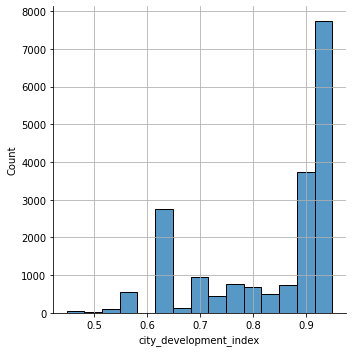

In [18]:
sns.displot(data_raw['city_development_index'], bins=15)
plt.grid()
pass

На гистограмме заметно, что также довольно много кандидатов находятся в городах с индексом 0.6 - 0.65.

## training_hours (количество завершенных часов обучения):
Среднее число часов обучения составляет 65, но медиана равна 47. Это значит что распределение имеет положительное искаженние. А именно 50% кандидатов заверишло до 47 часов обучения, а остальные распределились по оставшимся часам после 65. Построим гистограмму:


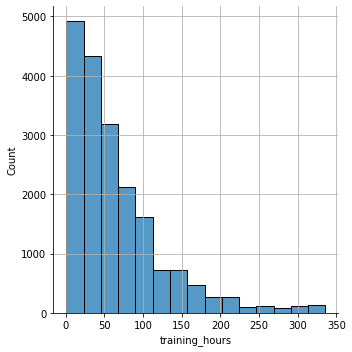

In [19]:
sns.displot(data_raw['training_hours'], bins=15)
plt.grid()
pass

Вычислим матрицу корреляции для количественных признаков (чтобы выявить связи между признаками):

In [20]:
corr_matrix = data_raw.corr()
corr_matrix

,enrollee_id,city_development_index,relevent_experience,training_hours,target
enrollee_id,1.000000,-0.040455,-0.043359,0.000998,0.049475
city_development_index,-0.040455,1.000000,0.059808,0.001920,-0.341665
relevent_experience,-0.043359,0.059808,1.000000,0.011566,-0.128430
training_hours,0.000998,0.001920,0.011566,1.000000,-0.021577
target,0.049475,-0.341665,-0.128430,-0.021577,1.000000


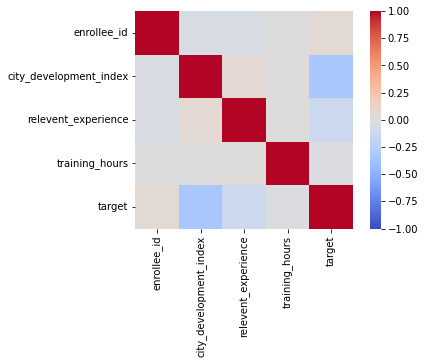

In [21]:
sns.heatmap(corr_matrix, square=True, cmap='coolwarm', vmin=-1, vmax=1)
pass

Благодаря визуальному образу корреляционной матрицы можно заметить, что нет признаков имеющих сильную связь.

## Получим информацию о категориальных признаках:

In [22]:
data_raw.describe(include=['category'])

,city,gender,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,18772,18698,16345,19093,13220,13018,18735
unique,123,3,3,5,6,22,8,6,6
top,city_103,Male,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13817,11598,14492,3286,3083,9817,8040


Для категориальных признаков мы получили такие характеристики, как:

1. Count - Количество значений. Видно, что все признаки имеют разное количество значений, следовательно присутствуют пропущенные значения.
2. Unique - Количество уникальных значений.
3. Top - Наиболее встречающееся значение.
4. Freq - Частота наиболее встречающегося значения.

In [23]:
data_raw['gender'].value_counts()

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

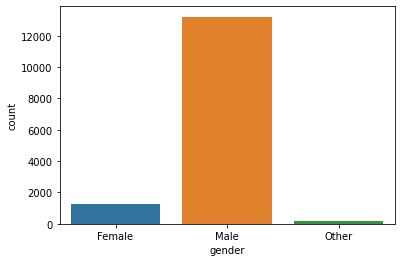

In [24]:
sns.countplot(x='gender', data=data_raw)
pass

Заметим, что в принципе в наборе данных количество мужчин больше более, чем в 10 раз.

In [25]:
data_raw['enrolled_university'].value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

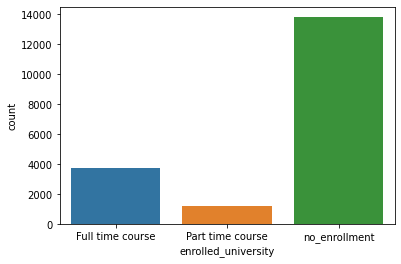

In [26]:
sns.countplot(x='enrolled_university', data=data_raw)
pass

Заметим, что no_enrollment составляет абсолютное большенство, при этом Full time course превышает Part time course примерно в 3 раза.

In [27]:
data_raw['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

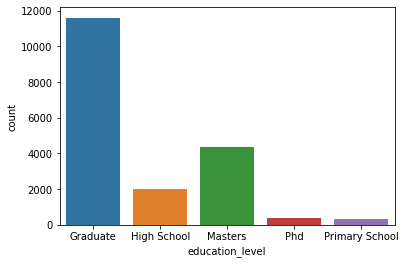

In [28]:
sns.countplot(x='education_level', data=data_raw)
pass

Заметим, что наибольшую часть составляют кандидаты с законченым Бакалавариатом, примерно в 3 раза меньше кандидатов с законченной магистратурой, далее следуют кандидаты, закончившие 11 классов и видимо, обучающиеся на бакалавра.

In [29]:
data_raw['major_discipline'].value_counts()

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

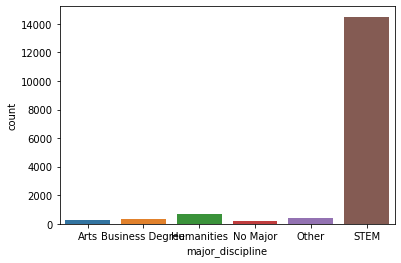

In [30]:
sns.countplot(x='major_discipline', data=data_raw)
pass

Из графика видно, что практически все кандидаты в качестве основной дисциплины имееют STEM.

In [31]:
data_raw['experience'].value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

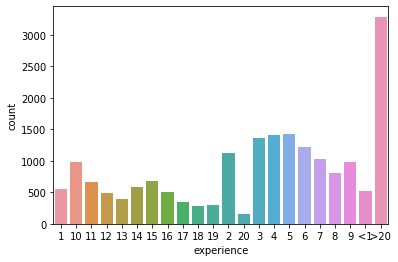

In [32]:
sns.countplot(x='experience', data=data_raw)
pass

Из графика видно, что большенство кандидатов имеют опыт более 20 лет, также большое количество кандидатов имеют опыт от 2 до 10 лет.

In [33]:
data_raw['company_size'].value_counts()

50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

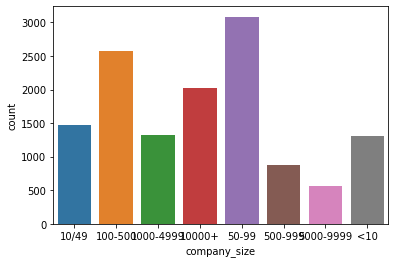

In [34]:
sns.countplot(x='company_size', data=data_raw)
pass

Также заметим, что наиболее часто встречаются компании численностью 50-99 и 10000+, а реже всего 500-999 и 5000-9999.

In [35]:
data_raw['company_type'].value_counts()

Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

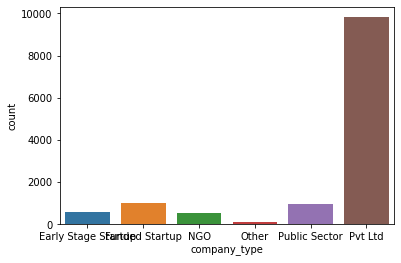

In [36]:
sns.countplot(x='company_type', data=data_raw)
pass

В основном все кандидаты работают в частных компаниях с ограниченной ответственностью.

In [37]:
data_raw['last_new_job'].value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

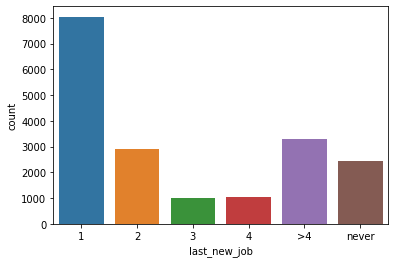

In [38]:
sns.countplot(x='last_new_job', data=data_raw)
pass

Также заметим, что большинство кандидатов находит новую работу после старой в первый год простоя. Примерно в 3 раза реже встречаются показатели: в течении 2 лет и более 4 лет.

Взглянем на всевозможные диаграммы рассеивания для каждой пары числовых признаков (возьмем случайные 10%)

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


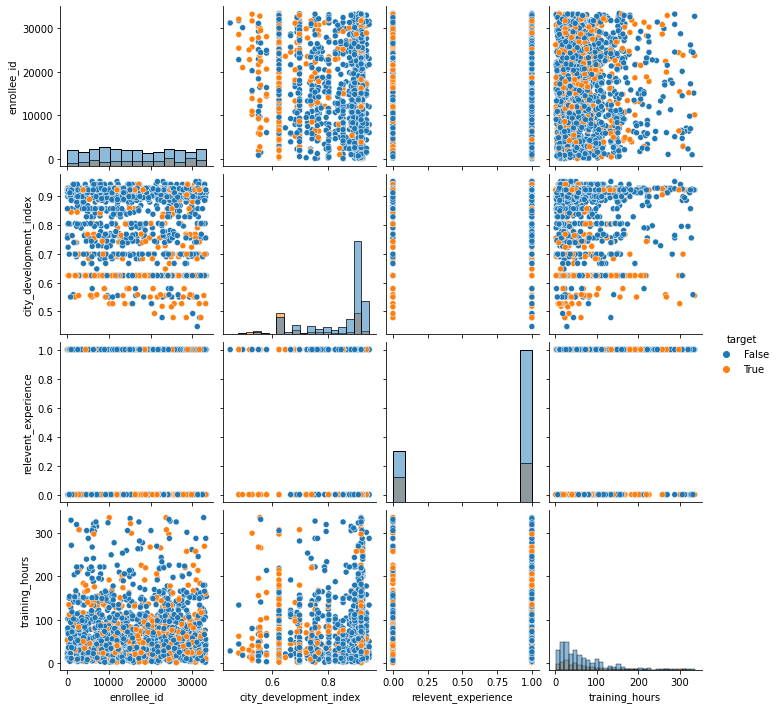

In [39]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data_raw.shape[0]), size=int(0.1 * data_raw.shape[0]), replace=False)
sns.pairplot(data_raw.iloc[random_subset], hue='target', diag_kind='hist')

Рассмотрим поподробнее city_development_index, relevent_experience и training_hours:

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


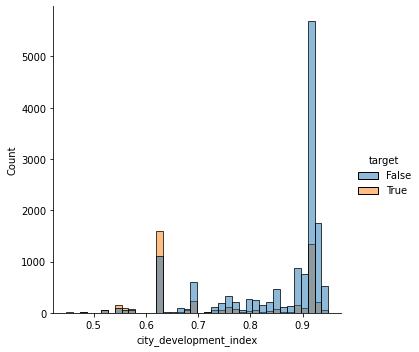

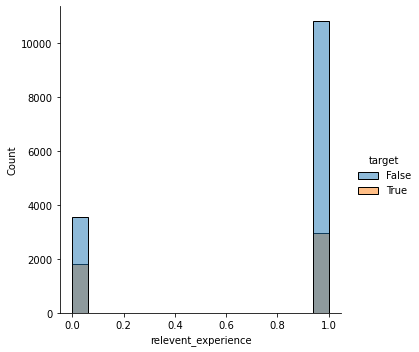

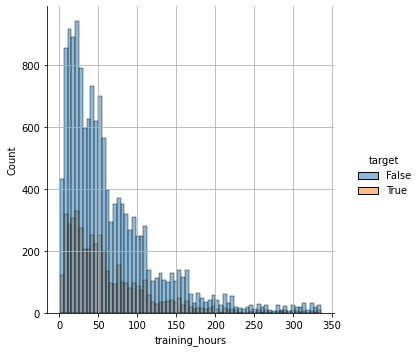

In [40]:
features = ['city_development_index', 'relevent_experience', 'training_hours']

for i, feature in enumerate(features):
    sns.displot(data=data_raw, x=feature, kind='hist', hue='target')
    
plt.grid()

Получили интересный реузьтат, что для city_development_index при индексе меньше 0,65 большенство ищет возможность сменить работу, а при индексе больше 0,65 не ищет. Так же видно, что люди имеющие соотсвествующий опыт более склонны остаться на прежней работе, чем люди без соотвестувющего опыта.

# 3. Обработка пропущенных значений

Заметим, что все пропуски в категориальных признаках, обработаем их следующим образом:

    1. Если в текущем признаке есть значение, которое во много раз популярнее других, будем заменять наиболее популярным значением.
    2. Если в текущем признаке нет значения, которое во много раз популярнее других, будем заменять новой категорией "Неизвестно".

In [41]:
data_raw['gender'].fillna('Male', inplace=True)
data_raw['enrolled_university'].fillna('no_enrollment', inplace=True)
data_raw['education_level'] = data_raw['education_level'].cat.add_categories('Unknown')
data_raw['education_level'].fillna('Unknown', inplace=True)
data_raw['major_discipline'].fillna('STEM', inplace=True)
data_raw['experience'] = data_raw['experience'].cat.add_categories('Unknown')
data_raw['experience'].fillna('Unknown', inplace=True)
data_raw['company_size'] = data_raw['company_size'].cat.add_categories('Unknown')
data_raw['company_size'].fillna('Unknown', inplace=True)
data_raw['company_type'].fillna('Pvt Ltd', inplace=True)
data_raw['last_new_job'].fillna('1', inplace=True)

In [42]:
data_raw.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

# 4. Обработка категориальных признаков

Закодируем категориальные признаки с помощью числовых признаков, применив метод бинаризации

In [43]:
data_raw = pd.get_dummies(data_raw)
print(data_raw.shape)
data_raw.head()

(19158, 190)


,enrollee_id,city_development_index,relevent_experience,training_hours,target,city_city_1,city_city_10,city_city_100,city_city_101,city_city_102,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,8949,0.920,True,36,True,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,29725,0.776,False,47,False,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,11561,0.624,False,83,False,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,33241,0.789,False,52,True,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,666,0.767,True,8,False,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# 5. Нормализация количественных признаков

Проведем нормализацию количественных признаков с помощью линейного преобразования к заданному отрезку [0,1].
Т.к. значения city_development_index принадлежат данному отрезку, а target и relevent_experience - это бинарные данные, следовательно данные столбцы нормализировать нет необходимости. Проведем нормализацию для training_hours:

In [44]:
data_numerical = data_raw[['training_hours']]
data_numerical = (data_numerical - data_numerical.min(axis=0)) / (data_numerical.max(axis=0) - data_numerical.min(axis=0))
data_numerical.describe()

,training_hours
count,19158.000000
mean,0.192140
std,0.179279
min,0.000000
25%,0.065672
50%,0.137313
75%,0.259701
max,1.000000


In [45]:
data_raw['training_hours'] = data_numerical

# 6. Деление данных на обучающую и тестовую выборки

Для классификации удовлетворенности клиента будем использовать все признаки за исключением enrollee_id.

In [46]:
X = data_raw.drop (['enrollee_id', 'target'], axis=1) 
y = data_raw['target']

Разобьем данные на обучающую (75%) и тестовую (25%) выборки:

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(14368, 4790)

# 7. Обучение модели (KNN)

Попробуем сначала классификатор с количеством соседей по умолчанию (5):

In [48]:
from sklearn.neighbors import KNeighborsClassifier

knn_default = KNeighborsClassifier()
knn_default.fit(X_train, y_train)
knn_training_predict = 100 * knn_default.score(X_train, y_train)
knn_test_predict = 100 * knn_default.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(knn_training_predict, knn_test_predict))

Accuracy. Train : 83.62%, Test: 74.95%. 


Теперь найдем оптимальный параметр для метода ближайших соседей:

In [49]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.21561759158568905 55


In [50]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

knn_training_predict = 100 * knn.score(X_train, y_train)
knn_test_predict = 100 * knn.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(knn_training_predict, knn_test_predict))

Accuracy. Train : 79.25%, Test: 77.97%. 


Точность модели, обученной с помощью метода k-ближайших соседей c оптимальным параметром, на обучаемой выборке хуже модели, обученной с помощью метода 5-ближайших соседей, зато на тестовой выборке лучше.

При этом данный алгоритм показывает не самых хороший результат по качеству модели ~78% на тестовой выборке.

# 8. Среднеквадратическая ошибка

Вычислим среднеквадратическую ошибку для алгоритма с оптимальным количеством ближайших соседей:

In [51]:
knn_train_predict = knn.score(X_train, y_train)
knn_test_predict = knn.score(X_test, y_test)

MSE_train = np.mean((knn_train_predict - y_train)**2)
MSE_test  = np.mean((knn_test_predict - y_test)**2)
print("MSE. Train : {:.2f}, Test: {:.2f}. ".format(MSE_train, MSE_test))

MSE. Train : 0.48, Test: 0.47. 


# 9. Обучение модели (GradientBoostingClassifier)

Теперь рассмотрим следующий алгоритм - Градиентный бустинг.

In [52]:
from sklearn import ensemble
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

gbt_training_predict = 100 * gbt.score(X_train, y_train)
gbt_test_predict = 100 * gbt.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(gbt_training_predict, gbt_test_predict))

Accuracy. Train : 84.21%, Test: 78.10%. 


## 9.1 Сравнение с KNN

Алгоритм Градиентно бустинг оказался точнее алгоритма к-ближайших соседей при оптимальных параметрах каждого из методов, как на обучающей выборке, так и на тестовой.

# 10. Общие выводы

В данной работе был представлен анализ данных о предсказании, хочет ли кандидат остаться работать в компании или перейдет на новую работу, а также решена задача классификации (кандидат ищет вариант смены работы или нет) с помощью моделей, натренированных двумя методами: К-ближайших соседей и Градиентный бустинг.

Таким образом, перед тем, как тренировать модель, нужно проанализировать данные и их подготовить, а именно: вычислить основные статистические характеристики и проанализировать их; проверить на пропущенные значения и обработать такие ситуации; подготовить категориальные признаки - провести бинаризацию номинальных признаков; провести нормализацию количественных признаков; разбить данные на обучающую и тестовую выборку; выбрать алгоритм классификации и проверить качество полученной модели.

В данной работе алгоритм Градиентный бустинг оказался лучше метода к-ближайших соседей по точности.